# Session 4 : Supervised learning (3/3)

## Preliminaries

Run the script `datasets.py` like you did in the last notebook to load the functions used to generate artificial datasets.

In [1]:
%run datasets.py

## Support Vector Machine

### Toy dataset

In [2]:
# create a dataset of 300 points with make_forge()
# and split it into a 270 points training set and 
# 30 points test set

X, y = make_forge(300)
print("X has", len(X), "points.")

from sklearn.model_selection import train_test_split

# we can explicitly tell the number of points in the test 
# set with the test_size argument. All the other points
# will be used as training points.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=30, random_state=0)
print("X_train has", len(X_train), "points.")
print("X_test has", len(X_test), "points.")

X has 300 points.
X_train has 270 points.
X_test has 30 points.


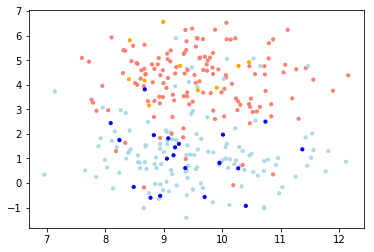

In [3]:
# print the training points on a 2d figure. Points with class
# 1 should have the color 'salmon' and points with the class
# 0 should have the color 'lightblue'.

# we need to create an array of colors representing the
# color of each point. We use the function 
# where(condition, value1, value2) from the numpy library.
# This function creates an array of only 2 different 
# values. If condition if True, value1 is used. Otherwise, 
# value2 is used.
import numpy as np
colors_train = np.where(y_train == 1, "salmon", "lightblue")

# now we can print the points
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_train[:,0], X_train[:,1], c=colors_train, s=10)

# print the test points on the same figure with color
# 'orange' for class 1 and 'blue' for class 0.

# same thing for test points
colors_test = np.where(y_test == 1, "orange", "blue")
plt.scatter(X_test[:,0], X_test[:,1], c=colors_test, s=10)

plt.show()

Accuracy of linear SVC = 0.9333333333333333
Class 0: 47 support vectors
Class 1: 47 support vectors


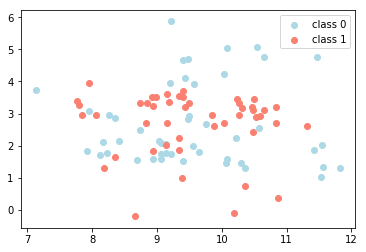

In [4]:
# create a SVM model for classification with SVC class.
# Use a linear kernel. Train it and evaluate its accuracy
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy of linear SVC =", accuracy)

# how many support vectors have been found for each class ?
print("Class 0:", model.n_support_[0], "support vectors")
print("Class 1:", model.n_support_[1], "support vectors")

# Print them
plt.scatter(
    model.support_vectors_[:model.n_support_[1], 0],
    model.support_vectors_[:model.n_support_[1], 1],
    c="lightblue", label="class 0")
plt.scatter(
    model.support_vectors_[model.n_support_[1]:, 0],
    model.support_vectors_[model.n_support_[1]:, 1],
    c="salmon", label="class 1")
    
plt.legend()
plt.show()

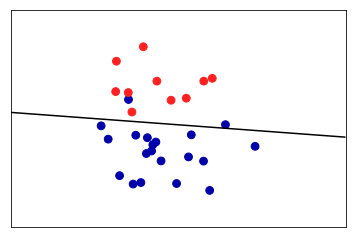

2/30 misclassified points


In [5]:
%run plots.py

# visualize the decision boundary of your SVM. How many 
# points are misclassified ? Is your dataset linearly 
# separable ? Do you think it would be possible to improve 
# the accuracy of the model ? Explain why.

plot_2d_separator(model, X_test, y_test)
plt.show()

n_misclassified = sum(model.predict(X_test) != y_test)
print("{}/{} misclassified points".format(
      n_misclassified, len(X_test)))

**Answer** : the dataset is not linearly separable because we cannot separate the red and blue points with a line. It might be possible to improve the accuracy since a slight modification (rotation of 5 degrees, anticlockwise) of the line could result in only one misclassified point (one blue point classified as a red point).

Model 1 (C=100)
  Train accuracy = 0.8888888888888888
  Test  accuracy = 0.9333333333333333


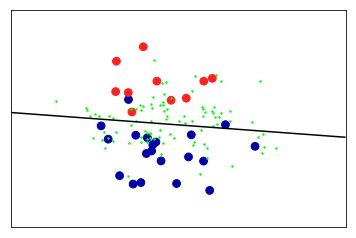

Model 2 (C=10)
  Train accuracy = 0.8888888888888888
  Test  accuracy = 0.9333333333333333


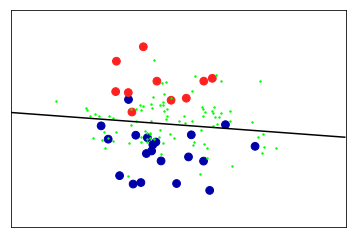

Model 3 (C=0.1)
  Train accuracy = 0.8888888888888888
  Test  accuracy = 0.9333333333333333


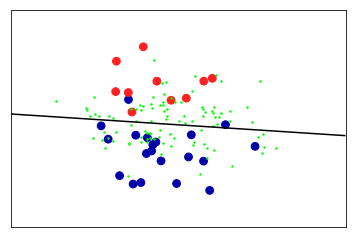

Model 4 (C=0.01)
  Train accuracy = 0.8814814814814815
  Test  accuracy = 0.9666666666666667


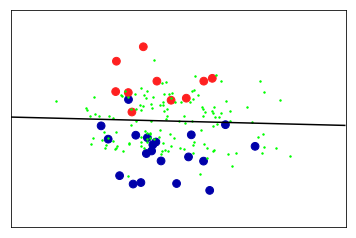

Model 5 (C=0.001)
  Train accuracy = 0.8851851851851852
  Test  accuracy = 0.9666666666666667


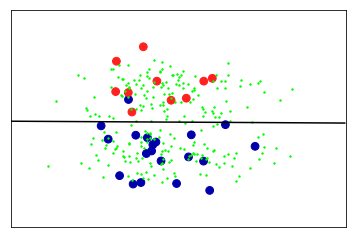

In [6]:
# train 5 other SVM with a modified value for the penalty and
# plot the decision boundary for each one.
# explain the effect of this parameter (what happend if we 
# increase/decrease it ?)
# Do you think it can help to prevent underfitting or 
# overfitting ?

model_1 = SVC(kernel="linear", C=100)
model_1.fit(X_train, y_train)
print("Model 1 (C=100)")
print("  Train accuracy =", model_1.score(X_train, y_train))
print("  Test  accuracy =", model_1.score(X_test, y_test))
plot_2d_separator(model_1, X_test, y_test)
plt.scatter(model_1.support_vectors_[:,0],
            model_1.support_vectors_[:,1], c="lime", s=2)
plt.show()

model_2 = SVC(kernel="linear", C=10)
model_2.fit(X_train, y_train)
print("Model 2 (C=10)")
print("  Train accuracy =", model_2.score(X_train, y_train))
print("  Test  accuracy =", model_2.score(X_test, y_test))
plot_2d_separator(model_2, X_test, y_test)
plt.scatter(model_2.support_vectors_[:,0],
            model_2.support_vectors_[:,1], c="lime", s=2)
plt.show()

model_3 = SVC(kernel="linear", C=0.1)
model_3.fit(X_train, y_train)
print("Model 3 (C=0.1)")
print("  Train accuracy =", model_3.score(X_train, y_train))
print("  Test  accuracy =", model_3.score(X_test, y_test))
plot_2d_separator(model_3, X_test, y_test)
plt.scatter(model_3.support_vectors_[:,0],
            model_3.support_vectors_[:,1], c="lime", s=2)
plt.show()

model_4 = SVC(kernel="linear", C=0.01)
model_4.fit(X_train, y_train)
print("Model 4 (C=0.01)")
print("  Train accuracy =", model_4.score(X_train, y_train))
print("  Test  accuracy =", model_4.score(X_test, y_test))
plot_2d_separator(model_4, X_test, y_test)
plt.scatter(model_4.support_vectors_[:,0],
            model_4.support_vectors_[:,1], c="lime", s=2)
plt.show()

model_5 = SVC(kernel="linear", C=0.001)
model_5.fit(X_train, y_train)
print("Model 5 (C=0.001)")
print("  Train accuracy =", model_5.score(X_train, y_train))
print("  Test  accuracy =", model_5.score(X_test, y_test))
plot_2d_separator(model_5, X_test, y_test)
plt.scatter(model_5.support_vectors_[:,0],
            model_5.support_vectors_[:,1], c="lime", s=2)
plt.show()

**Answer** : the parameter `C` represents the weight of each misclassified point. When `C` is high, the model tries to avoid as much as possible a misclassified point, even if it implies to have a smaller margin. We can see that when `C=100` or when `C=10`, the number of support vectors (in green) is small, and the distance between the black line and the furthest support vector is low (this distance is the margin).

When `C` is low, the model tries to have a large margin, instead of trying to reduce the number of misclassified points (when `C` is low, the weight of an error is also low). We can see that with `C=0.001`, the number of support vectors is high (a lot of green points) and so is the margin. In this case, the test accuracy is perfect.

The complexity of a SVM can be represented by the number of support vectors needed to draw the separating line. We can see that when `C` is low, there are a lot of support vectors, so our model is complex. And because we have a perfect test accuracy, we can suppose that our model is overfitting (too close to our dataset, not very able to generalize to unseen new data points). By increasing the value of `C`, we reduce the number of required support vectors, so is the complexity of our model. We are less likely to be overfitting.

### Real case dataset

In [7]:
# load the breast cancer dataset and train a linear SVC model
# on this dataset. You can create several models and adjust
# the value of the penalty parameter to find the optimal one.
# Can you get a better accuracy than the KNN model (it was 
# 0.923?)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

model_breast = SVC(kernel="linear", C=10, random_state=0)
model_breast.fit(X_train, y_train)
print("Train accuracy:", model_breast.score(X_train, y_train))
print("Test  accuracy:", model_breast.score(X_test, y_test))

# test accuracy is better compared to a KNN model.

Train accuracy: 0.9765258215962441
Test  accuracy: 0.965034965034965


# Neural Networks

## Activation functions

The activation function $f$ of a neuron can be linear or non linear. The most used activation functions are :
* sigmoid
* tanh
* ReLu (rectified linear)

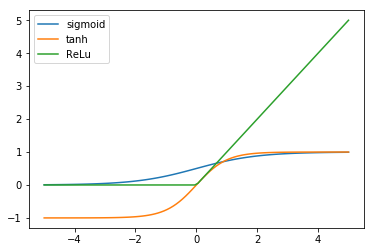

In [8]:
# using the example for sigmoid, plot the representation of
# tanh and ReLu on the same graph. ReLu is defined as :
# ReLu(x) = max(0, x)

import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 100)
sigmoid_x = sigmoid(x)
tanh_x    = np.tanh(x)
ReLu_x    = np.maximum(0, x)

figure = plt.figure()
plt.plot(x, sigmoid_x, label="sigmoid")
plt.plot(x, tanh_x,    label="tanh")
plt.plot(x, ReLu_x,    label="ReLu")
plt.legend()
plt.show()

### Tuning a neural network

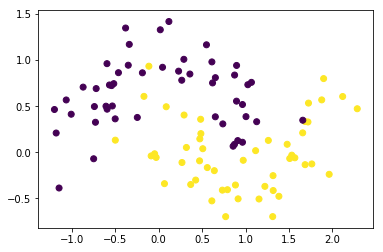

In [9]:
# we use a non linearly separable dataset that looks
# like two moons
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

As you can see, using a linear SVM does not seem to be the best choice. Let's use neural networks to be able to classify this dataset. First, split the data into a training and a test set.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=0)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train accuracy: 0.8666666666666667
Test  accuracy: 0.84


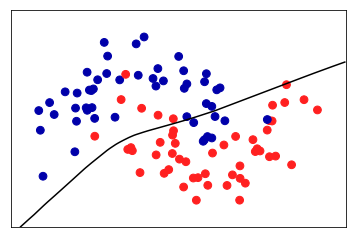

In [11]:
# create a neural network with all default parameters.
# Compute its accuracy and print its decision boundary
# Do you think the neural network is good ? Explain why.
from sklearn.neural_network import MLPClassifier

network = MLPClassifier()
network.fit(X_train, y_train)
print("Train accuracy:", network.score(X_train, y_train))
print("Test  accuracy:", network.score(X_test, y_test))
plot_2d_separator(network, X, y)
plt.show()

**Answer** : the accuracy of the neural network is not very good (0.84) and with the decision boundary, we can see that the network is not able to understand that the real decision boundary has a moon shape. Moreover, we have a warning message indicating that the network has not converged after 200 iterations (the default number of iterations). We need to tune our network to improve its performance.

In [12]:
# there exist different algorithms to train a neural network.
# the default one is called 'adam'. Use the documentation
# to know what are the other kind of algorithm. Create 
# other networks with each type of algorithm. Which one is
# the best ?

# 3 types of solver are available in the MLPClassifier class:
#   - adam
#   - sgd
#   - lbfgs

nn_adam = MLPClassifier(solver="adam")
nn_adam.fit(X_train, y_train)
print("Adam")
print("  Train accuracy:", nn_adam.score(X_train, y_train))
print("  Test  accuracy:", nn_adam.score(X_test, y_test))

nn_sgd = MLPClassifier(solver="sgd")
nn_sgd.fit(X_train, y_train)
print("SGD")
print("  Train accuracy:", nn_sgd.score(X_train, y_train))
print("  Test  accuracy:", nn_sgd.score(X_test, y_test))

nn_lbfgs = MLPClassifier(solver="lbfgs")
nn_lbfgs.fit(X_train, y_train)
print("LBFGS")
print("  Train accuracy:", nn_lbfgs.score(X_train, y_train))
print("  Test  accuracy:", nn_lbfgs.score(X_test, y_test))

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Adam
  Train accuracy: 0.8666666666666667
  Test  accuracy: 0.84


/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


SGD
  Train accuracy: 0.8266666666666667
  Test  accuracy: 0.84
LBFGS
  Train accuracy: 1.0
  Test  accuracy: 0.8


**Answer** : the 3 networks have almost the same test accuracy (between 0.8 and 0.88). The dataset is not large enough to make any conclusions on the performance increase/degradation when we swicth the training algorithm. But we can see that when using the LBFGS algorithm, we do not have any convergence warning message. As explained in the documentation, for small datasets LBFGS can converge faster.

In [13]:
# by default, the neural network has only 1 hidden layer of
# 100 neurons. Use the right parameter to create a network of
# 2 hidden layers, each one having 10 neurons.

nn_2layers = MLPClassifier(hidden_layer_sizes=(10, 10),
                           max_iter=5000, random_state=0)
nn_2layers.fit(X_train, y_train)
print("2 hidden layers of 10 neurons")
print("  Train accuracy:", nn_2layers.score(X_train, y_train))
print("  Test  accuracy:", nn_2layers.score(X_test, y_test))

# Create other networks with different parameters to see if
# many small layers is better than 1 big layer.

nn_1 = MLPClassifier(hidden_layer_sizes=(1000),
                     max_iter=5000, random_state=0)
nn_1.fit(X_train, y_train)
print("1 hidden layer of 1000 neurons")
print("  Train accuracy:", nn_1.score(X_train, y_train))
print("  Test  accuracy:", nn_1.score(X_test, y_test))

nn_2 = MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5),
                     max_iter=5000, random_state=0)
nn_2.fit(X_train, y_train)
print("4 hidden layers of 5 neurons")
print("  Train accuracy:", nn_2.score(X_train, y_train))
print("  Test  accuracy:", nn_2.score(X_test, y_test))

2 hidden layers of 10 neurons
  Train accuracy: 0.84
  Test  accuracy: 0.84
1 hidden layer of 1000 neurons
  Train accuracy: 0.9866666666666667
  Test  accuracy: 0.88
4 hidden layers of 5 neurons
  Train accuracy: 0.9866666666666667
  Test  accuracy: 0.92


**Answer** : we can see that with a single layer of 1000 neurons, the training and test accuracies are better than with 2 layers of 10 neurons. In general, the only way to increase the accuracy of the model is to increase the number of neurons, because more neurons means that the model is more complex and can find non trivial boundaries. But having more layers is more efficient than having more neurons. If the activation function is non-linear, cascading this non-linearity can also create complex functions without requiring a lot of neurons. We can see that with only 20 neurons divided into 4 layers (so 5 neurons per layer), we obtain a better test accuracy than with 1000 neurons.

In [14]:
# You can also modify the activation function of the neurons 
# in your network. Create a network for each type of
# activation. Which one is the best ?

# identity
nn_ident = MLPClassifier(hidden_layer_sizes=(20,20),
                         activation="identity", 
                         max_iter=5000,
                         random_state=0)
nn_ident.fit(X_train, y_train)
print("Identity activation")
print("  Train accuracy:", nn_ident.score(X_train, y_train))
print("  Test  accuracy:", nn_ident.score(X_test, y_test))

# sigmoid
nn_sigm = MLPClassifier(hidden_layer_sizes=(20,20),
                        activation="logistic", 
                        max_iter=5000,
                        random_state=0)
nn_sigm.fit(X_train, y_train)
print("Sigmoid activation")
print("  Train accuracy:", nn_sigm.score(X_train, y_train))
print("  Test  accuracy:", nn_sigm.score(X_test, y_test))

# tanh
nn_tanh = MLPClassifier(hidden_layer_sizes=(20,20),
                        activation="tanh", 
                        max_iter=5000,
                        random_state=0)
nn_tanh.fit(X_train, y_train)
print("Tanh activation")
print("  Train accuracy:", nn_tanh.score(X_train, y_train))
print("  Test  accuracy:", nn_tanh.score(X_test, y_test))

# relu
nn_relu = MLPClassifier(hidden_layer_sizes=(20,20),
                        activation="relu", 
                        max_iter=5000,
                        random_state=0)
nn_relu.fit(X_train, y_train)
print("ReLu activation")
print("  Train accuracy:", nn_relu.score(X_train, y_train))
print("  Test  accuracy:", nn_relu.score(X_test, y_test))

Identity activation
  Train accuracy: 0.8533333333333334
  Test  accuracy: 0.84
Sigmoid activation
  Train accuracy: 0.5066666666666667
  Test  accuracy: 0.48
Tanh activation
  Train accuracy: 0.9866666666666667
  Test  accuracy: 0.84
ReLu activation
  Train accuracy: 0.9866666666666667
  Test  accuracy: 0.92


**Answer** : in this case, ReLu activations are the best. This can be exlained with the graphic representations of the activation functions. During backpropagation, gradient is transfered layer from layer in reverse order, but the gradient is multiplied by the value of the derivative of the activation function everytime it is transfered. The derivative of a function at a certain point is equal to the slope of the function at this same point. With ReLu, the slope is very high compared to sigmoid or tanh. So the gradient have larger values, and the model can have a faster convergence, and so better results. In general, we need to test every activate function because the result depends on the dataset. 

**Tuning a neural network and testing (almost) every combinations of hyperparameters is time-consuming but is the key to have good performance with neural networks.**